# 12. Tutorial 6: Basic econometric analysis (1)

#### Naoki TANI
#### Center for Advanced Policy Studies (CAPS), Institute of Economic Research, Kyoto University
#### May 23, 2024

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from statsmodels.formula.api import ols, logit, probit
from statsmodels.iolib.summary2 import summary_col

## 1. Simple linear regression

#### First, we review the simple linear regression (SLR) model. SLR is mainly used to describe the linear dependence of one variable on another.
#### Linear regression estimates the best-fit line through a scatterplot of the data by minimizing the difference between the actual data and predicted value of the line.

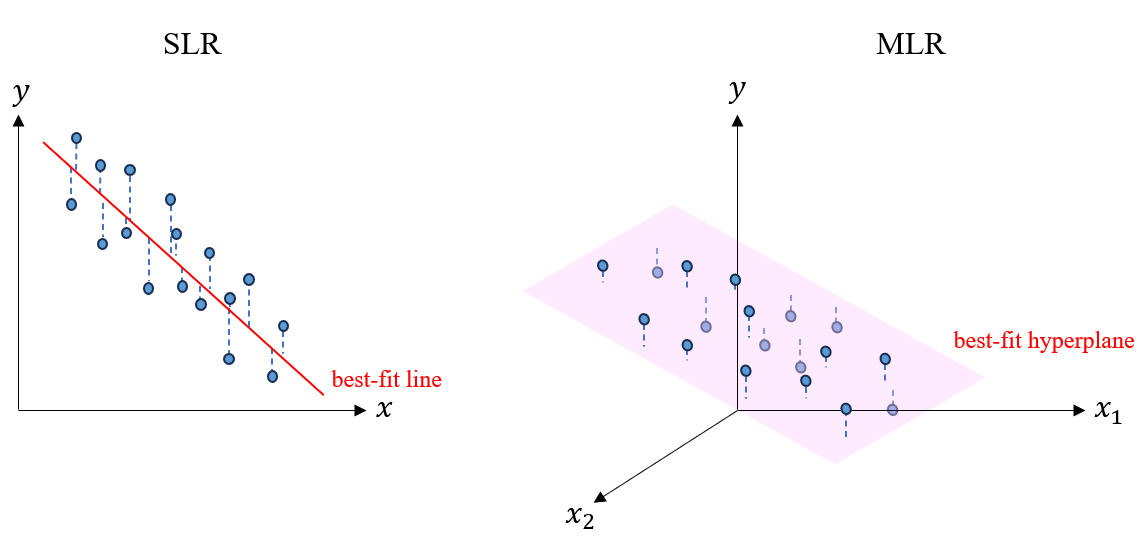

In [2]:
Image(filename="least_squares_regression.png", height=900, width=1100)

#### Consider a set of $n$ points $(x_i, y_i)$, we want to find the best-fit line $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$ to minimize the sum of squared errors $\sum^{n}_{i=1}(y_i - \hat{y}_i)^2$.
#### Recall that $\hat{\beta}_0$ and $\hat{\beta}_1$ are the intercept and slope of the best-fit line with the minimum sum of squared vertical distances to the data points.

#### Define the sum of squared errors as 
#### $$L(\hat{\beta}_0, \hat{\beta}_1) = \sum^{n}_{i=1}(y_i - \hat{y}_i)^2 = \sum^{n}_{i=1}(y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)^2$$
#### Since we want to minimize $L(\hat{\beta}_0, \hat{\beta}_1)$, we set the derivatives of $L$ with respect to $\hat{\beta}_0$ and $\hat{\beta}_1$ to $0$.
#### $$\frac{\partial L}{\partial \hat{\beta}_0}= 2(n\hat{\beta}_0 + \hat{\beta}_1 \sum^n_{i=1}x_{i} - \sum^n_{i=1}y_{i}) = 0$$
#### Then, we derive 
#### $$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$$

#### Next, we use the derivatives of $L$ with respect to $\hat{\beta}_1$.
#### $$\frac{\partial L}{\partial \hat{\beta}_1}= \sum^n_{i=1} -2( x_i y_i -\hat{\beta}_0 x_i - \hat{\beta}_1 x_{i}^2) = 0$$
#### Substituting $\hat{\beta}_0$ we derived above to the equation $\frac{\partial L}{\partial \hat{\beta}_1}=0$ yields
### $$\hat{\beta_1} = \frac{\sum^{n}_{i=1}(x_i y_i - x_i \bar{Y})}{\sum^{n}_{i=1}(x_{i}^2)-x_i \bar{x}}$$

## 2. Multiple linear regression

### 2-1. Least squares estimate

#### Multiple linear regression (MLR) models have multiple independent variables. The least squares estimate $(\hat{\beta}_0, ..., \hat{\beta}_k)$ for $(\beta_0, ..., \beta_k)$ is the intercept and slopes of the hyperplane (超平面) with the minimum sum of squared vertical distance to the datapoints.
#### Consider a set of $n$ points $(x_{i1}, x_{i2}, ..., x_{ik}, y_i)$, the best-fit hyperplane $\hat{y}_i$ minimizes the sum of squared errors $\sum^{n}_{i=1}(y_i - \hat{y}_i)^2= \sum^{n}_{i=1}(y_i - \hat{\beta}_0 - \hat{\beta}_1 x_{i1} - \hat{\beta}_2 x_{i2} ,..., - \hat{\beta}_k x_{ik})^2$.

#### As in the case of SLR, we define the sum of squared errors as
#### $$L(\hat{\beta}_0, \hat{\beta}_1, ..., \hat{\beta}_k) = \sum^{n}_{i=1}(y_i - \hat{y}_i)^2 = \sum^{n}_{i=1}(y_i - \hat{\beta}_0 - \hat{\beta}_1 x_{i1}-,..., - \hat{\beta}_k x_{ik})^2$$
#### Take the derivaives of $L$ with respect to $\hat{\beta}_j$ and equate them to $0$.
#### $$\frac{\partial L}{\partial \hat{\beta}_0}= -2(\sum^{n}_{i=1}y_i - n \hat{\beta}_0 - \hat{\beta}_1 \sum^n_{i=1}x_{i1} -,...,- \hat{\beta}_k \sum^n_{i=1}x_{ik}) = 0$$
#### $$\frac{\partial L}{\partial \hat{\beta}_j}= -2(\sum^{n}_{i=1}x_{ij}y_i - \hat{\beta}_0 \sum^{n}_{i=1}x_{ij} - \hat{\beta}_1 \sum^n_{i=1}x_{i1}x_{ij} -,...,- \hat{\beta}_j \sum^n_{i=1}x_{ij}^2-,...,-\hat{\beta}_k \sum^n_{i=1}x_{ik}x_{ij}) = 0,  \hspace{5mm} j=1,2,...,k$$ 
#### The least squares estimate $(\hat{\beta}_0, ..., \hat{\beta}_k)$ is the solution to the following system of $k+1$ equations with $k+1$ unknowns, called the normal equations (正規方程式):

#### $$n \hat{\beta}_0 + \hat{\beta}_1 \sum^{n}_{i=1}x_{i1} + \hat{\beta}_2 \sum^{n}_{i=1}x_{i2} +,..., + \hat{\beta}_k \sum^{n}_{i=1}x_{ik} = \sum^{n}_{i=1}y_{i}$$

#### $$\hat{\beta}_0 \sum^{n}_{i=1}x_{i1} + \hat{\beta}_1 \sum^{n}_{i=1}x_{i1}^2 + \hat{\beta}_2 \sum^{n}_{i=1}x_{i1}x_{i2} +,..., + \hat{\beta}_k \sum^{n}_{i=1}x_{i1}x_{ik} = \sum^{n}_{i=1}x_{i1}y_{i}$$

#### $$\hat{\beta}_0 \sum^{n}_{i=1}x_{i2} + \hat{\beta}_1 \sum^{n}_{i=1}x_{i1}x_{i2} + \hat{\beta}_2 \sum^{n}_{i=1}x_{i2}^2 +,..., + \hat{\beta}_k \sum^{n}_{i=1}x_{i2}x_{ik} = \sum^{n}_{i=1}x_{i2}y_{i}$$
#### $$...$$
#### $$\hat{\beta}_0 \sum^{n}_{i=1}x_{ik} + \hat{\beta}_1 \sum^{n}_{i=1}x_{i1}x_{ik} + \hat{\beta}_2 \sum^{n}_{i=1}x_{i2}x_{ik} +,..., + \hat{\beta}_k \sum^{n}_{i=1}x_{ik}^2 = \sum^{n}_{i=1}x_{ik}y_{i}$$

#### Let $X$ be an $n \times k$ matrix: 
$$\begin{bmatrix}
1          & x_{11} & x_{12} & \cdots & x_{1j} & \cdots & x_{1k}\\
1          & x_{21} & x_{22} & \cdots & x_{2j} & \cdots & x_{2k}\\
\vdots     & \vdots & \vdots & \ddots &        &        & \vdots \\
1          & x_{i1} & x_{i2} &        & x_{ij} &        & x_{ik} \\
\vdots     & \vdots & \vdots &        & \vdots & \ddots &\vdots \\
1          & x_{n1} & x_{n2} & \cdots & x_{nj} & \cdots & x_{nk}
\end{bmatrix}$$

#### Let $Y$ be an $n \times 1$ vector:
$$\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{i} \\
\vdots \\
y_{n}
\end{bmatrix}$$

#### Let $\hat{B}$ be an $k \times 1$ vector:
$$\begin{bmatrix}
\hat{\beta}_{0} \\
\hat{\beta}_{1} \\
\vdots \\
\hat{\beta}_{j} \\
\vdots \\
\hat{\beta}_{k} 
\end{bmatrix}$$


#### The normal equations can be rewritten more simply as 
#### $$(X^{T}X)\hat{B} = X^{T}Y$$.
#### The least squares estimate is 
#### $$\hat{B} = (X^{T}X)^{-1}X^{T}Y$$

### 2-2. Example

#### We create example dataset.
#### True model of our example is $y_i = 1 + 0.2 x_{i1} + 1.334 x_{i2}$

In [3]:
# Define true parameters
beta_1 = 0.2
beta_2 = 1.334
# define true model
x1 = np.linspace(0, 100, 500)
x2 = np.linspace(20, 100, 500)

X = [[x_1, x_2] for x_1, x_2 in zip(x1, x2) ]
X = np.array(X)
X.T

y_true = x1*beta_1 + x2*beta_2
y_true;

In [4]:
# create sample data by adding noise
sigma = 10
y_sample = y_true + np.random.normal(0, 1, 500)*sigma
y_sample;

In [5]:
hat_beta1, hat_beta2 = np.linalg.inv(X.T @ X) @ X.T @ y_sample.T
y_hat =  x1*hat_beta1 + x2*hat_beta2
print(hat_beta1, hat_beta2)

0.25170417045432464 1.288386342323055


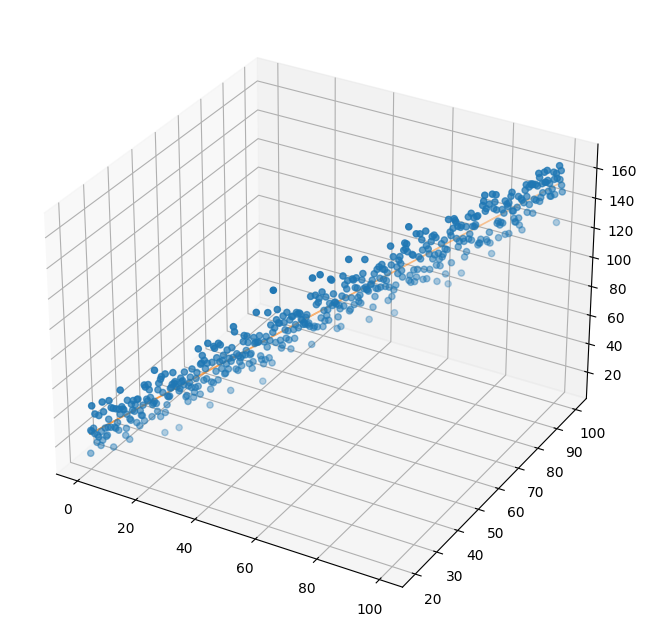

In [6]:
#plt.scatter(x1, x2, y_true)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

#ax.scatter(x1,x2,y_true, s=0.5)
ax.scatter(x1,x2,y_sample)
ax.scatter(x1,x2,y_hat, s = 0.1)
plt.show()

#### You can use `statsmodels`.

In [7]:
sample = pd.DataFrame({'y':y_sample, 'x1':x1, 'x2':x2})

In [8]:
formula = 'y ~ x1 + x2 -1'
model = ols(formula, data=sample).fit()

In [9]:
res = summary_col(model, stars=True, float_format='%0.4f',
                           info_dict={'N': lambda x: "{0:d}".format(int(x.nobs))},drop_omitted=True)
print(res)


                   y    
------------------------
x1             0.2517***
               (0.0491) 
x2             1.2884***
               (0.0441) 
R-squared      0.9341   
R-squared Adj. 0.9339   
N              500      
Standard errors in
parentheses.
* p<.1, ** p<.05,
***p<.01


## 3. Example of analyzing a survey data

In [23]:
kochi_df = pd.read_csv('kochi_survey_mikon.csv')

# create ID column
kochi_df.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
kochi_df['ID'] = kochi_df['ID'].astype(int)

# rename column name
kochi_df.rename(columns={'問9':'q9', '問11':'q11', '問12':'q12'}, inplace=True)

# convert data types
kochi_df = kochi_df.astype({'F1':np.float64, 'F2':np.float64, 'F3':np.float64, 'F4':np.float64, 'F5':np.float64, 'F6':np.float64, 'F7':np.float64,\
                          'F8':np.float64, 'F11':np.float64, 'F12':np.float64, 'F13':np.float64, 'q9':np.float64,\
                          'q11':np.float64, 'q12':np.float64})

#相手に求める年収の「８」を０にした順序データにする
kochi_df['order_wish_earnings'] = kochi_df['q9']
kochi_df.loc[(kochi_df['q9']==8), 'order_wish_earnings'] = 0

kochi_df;

### Exercise. Estimate the effect of personal attributes on annual income that unmarried men and women expect their would-be partner to earn.